In [1]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [0]:
# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/SMS Spam Collection', sep='\t', names=['label', 'message'])

# **Exploring the Dataset**

In [4]:
df.columns

Index(['label', 'message'], dtype='object')

In [5]:
df.shape

(5572, 2)

In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Count')

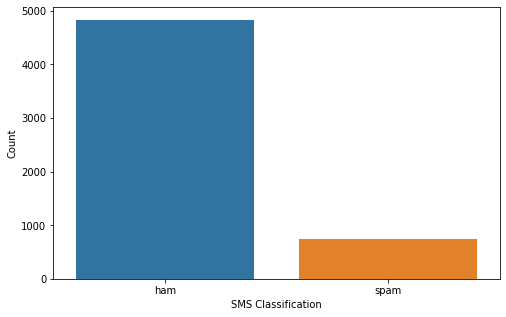

In [8]:
# Visualizing the count of 'spam' messages in the dataset
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df)
plt.xlabel('SMS Classification')
plt.ylabel('Count')

# **Data Cleaning and Preprocessing**

In [9]:
# Importing essential libraries for performing Natural Language Processing on 'SMS Spam Collection' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# Cleaning the messages
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):

  # Cleaning special character from the message
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.message[i])

  # Converting the entire message into lower case
  message = message.lower()

  # Tokenizing the review by words
  words = message.split()

  # Removing the stop words
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  message = ' '.join(words)

  # Building a corpus of messages
  corpus.append(message)

In [11]:
corpus[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [0]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [0]:
# Extracting dependent variable from the dataset
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values

# **Model Building**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [15]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [17]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 98.57%
Precision score is: 0.94
Recall score is: 0.96


In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[946,   9],
       [  7, 153]])

Text(69.0, 0.5, 'Actual values')

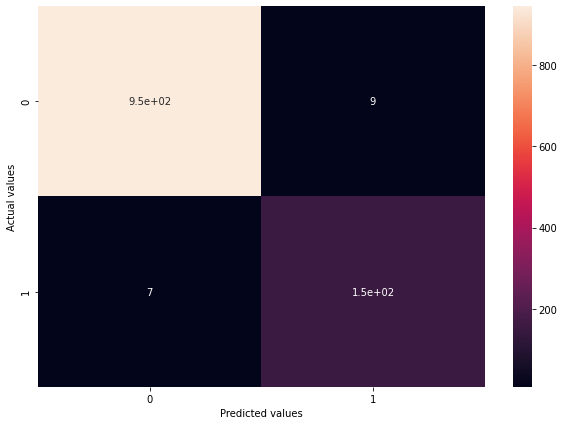

In [20]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [21]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy score for alpha=0.0 is: 98.3%
Accuracy score for alpha=0.1 is: 98.39%
Accuracy score for alpha=0.2 is: 98.57%
Accuracy score for alpha=0.3 is: 98.83%
Accuracy score for alpha=0.4 is: 98.83%
Accuracy score for alpha=0.5 is: 98.83%
Accuracy score for alpha=0.6 is: 98.83%
Accuracy score for alpha=0.7 is: 98.83%
Accuracy score for alpha=0.8 is: 98.83%
Accuracy score for alpha=0.9 is: 98.65%
Accuracy score for alpha=1.0 is: 98.57%
--------------------------------------------
The best accuracy is 98.83% with alpha value as 0.3


In [25]:
classifier = MultinomialNB(alpha=0.3)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

# **Predictions**

In [0]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_message = [ps.stem(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = cv.transform([final_message]).toarray()
  return classifier.predict(temp)

In [26]:
# Predicting values
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a SPAM message!


In [27]:
# Predicting values
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a normal message.


In [28]:
# Predicting values
sample_message = 'You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP.'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a SPAM message!
